> *By Hammad Zahid | Data Scientist & Analyst*  
> 🔗 [LinkedIn](https://www.linkedin.com/in/hammad-zahid-xyz) | 🐙 [GitHub](https://github.com/Hamad-Ansari) | ✉️ [Email](Hammadzahid24@gmail.com)

# Image Classification
> ## Famnist dataset image classification using NN architecture

In [60]:
# libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


from tensorflow.keras import layers, models

In [61]:
# load data 
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [62]:
# shape of data
print("Train Images Shape: ", train_images.shape)
print("Train Labels Shape: ", train_labels.shape)
print("Test Images Shape: ", test_images.shape)
print("Test Labels Shape: ", test_labels.shape)

Train Images Shape:  (60000, 28, 28)
Train Labels Shape:  (60000,)
Test Images Shape:  (10000, 28, 28)
Test Labels Shape:  (10000,)


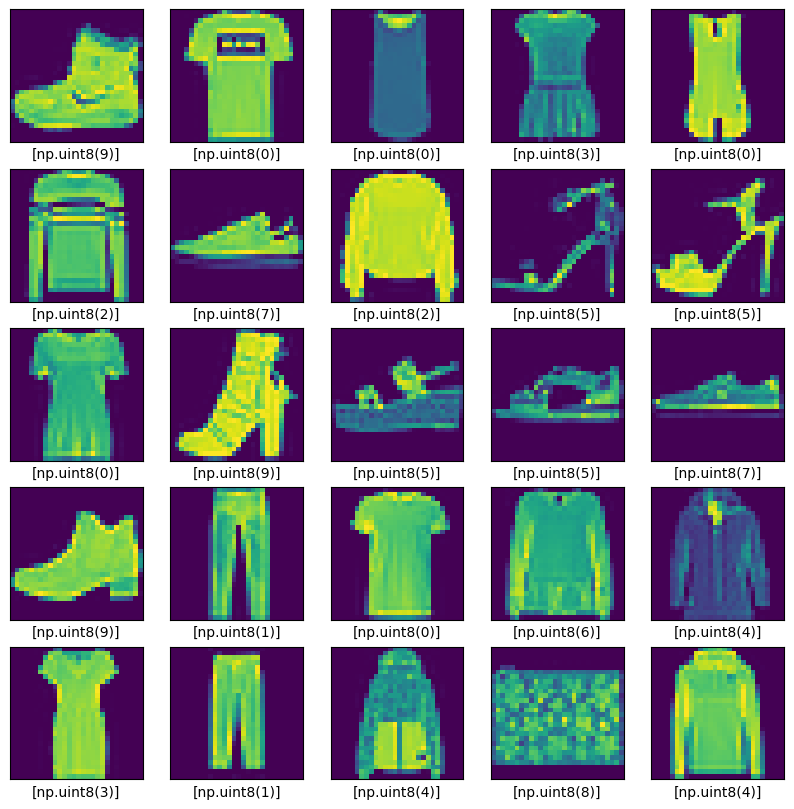

In [63]:
# Displaying an image from the dataset as dachbord

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel([train_labels[i]])
    plt.imshow(train_images[i])
    #plt.title(f"Label: {train_labels[i]}")
plt.show()

Random Index:  23349


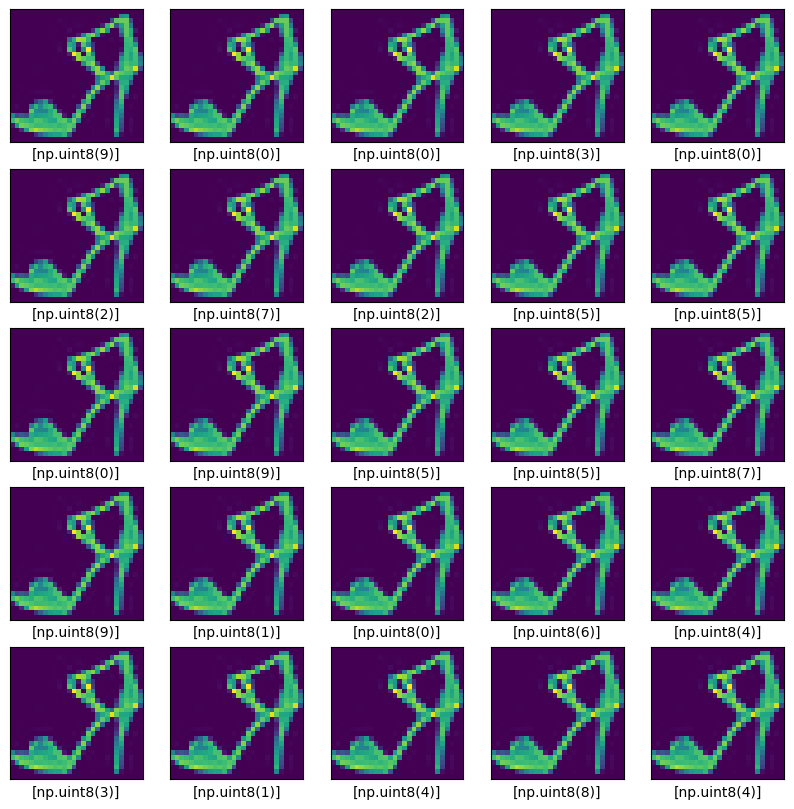

In [64]:
import random
random_index = random.randint(0, len(train_images)-1)
print("Random Index: ", random_index)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel([train_labels[i]])
    plt.imshow(train_images[random_index])
    #plt.title(f"Label: {train_labels[i]}")
plt.show()

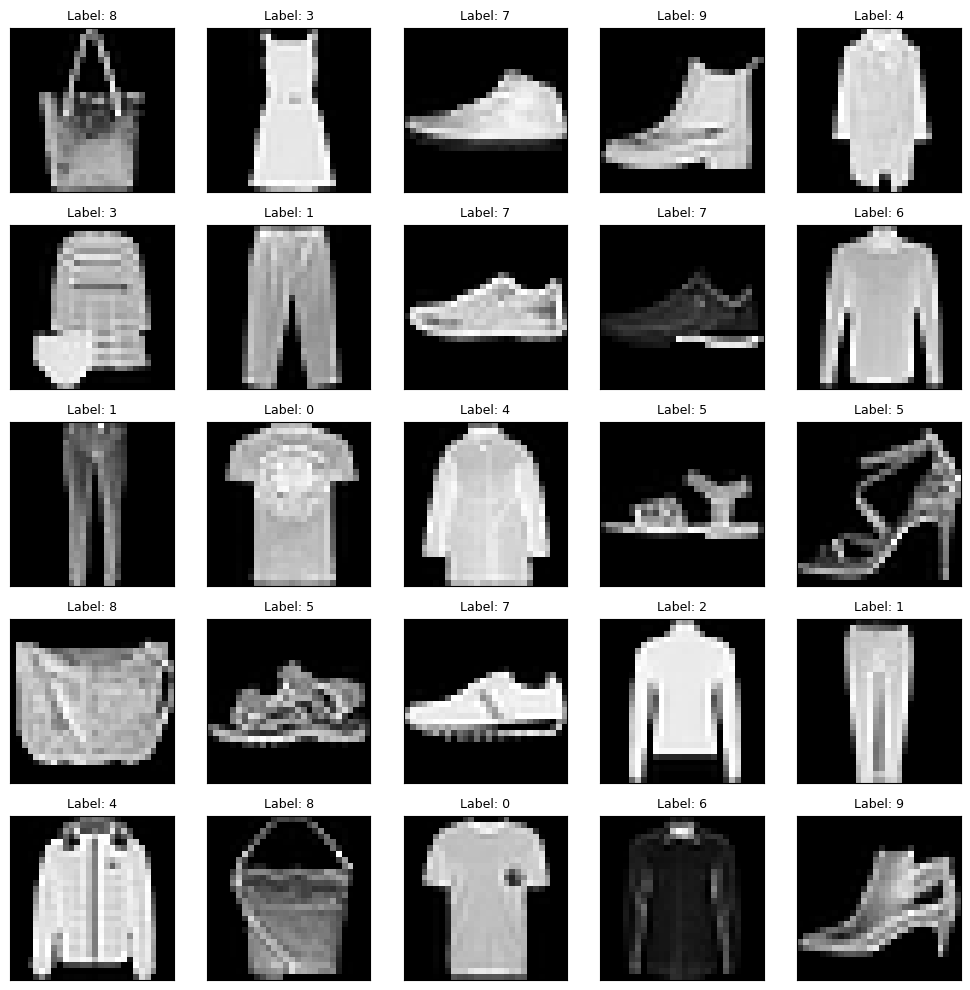

In [65]:
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i in range(25):
    random_index = random.randint(0, len(train_images) - 1)

    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[random_index], cmap='gray')
    plt.title(f"Label: {train_labels[random_index]}", fontsize=9)

plt.tight_layout()
plt.show()


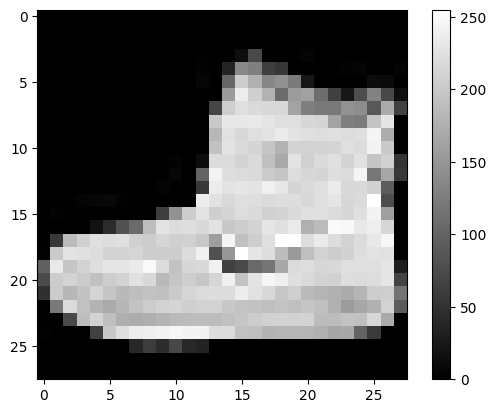

In [66]:
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

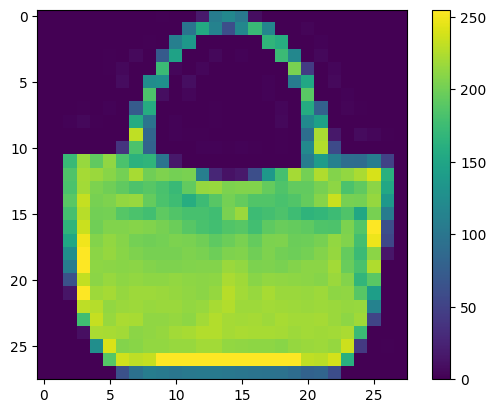

In [67]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

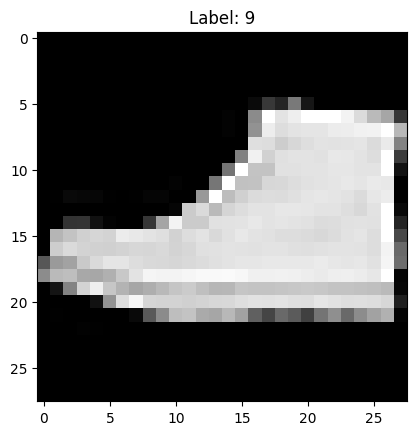

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  10  56  37 121  22   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0 139 255 228 238 255 255 255 243 219 186 166  54 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0 146 237 221 227 229 229 236 237 241 242 255 184 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 223 221 205 215 22

In [68]:
import random
rand_index = random.randint(0, train_images.shape[0] - 1)
plt.imshow(train_images[rand_index], cmap='gray')
plt.title(f'Label: {train_labels[rand_index]}')
plt.show()

# Display the values of each pixel in the selected image
print('Pixel values:')
for row in train_images[rand_index]:
    for pixel in row:
        print(f'{pixel:3}', end=' ')
    print()
    

In [69]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [70]:
# convert into float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [71]:
# reshape data to add channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

## Built the model

In [88]:
# creat the model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))  
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# model.summary()



In [89]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [91]:
# train the model
model.fit(train_images,train_labels, epochs=10, batch_size=32,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8254 - loss: 0.4828 - val_accuracy: 0.8650 - val_loss: 0.3683
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8800 - loss: 0.3294 - val_accuracy: 0.8877 - val_loss: 0.3100
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8949 - loss: 0.2852 - val_accuracy: 0.8876 - val_loss: 0.3123
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9073 - loss: 0.2540 - val_accuracy: 0.8896 - val_loss: 0.3116
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9166 - loss: 0.2273 - val_accuracy: 0.9062 - val_loss: 0.2654
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9237 - loss: 0.2063 - val_accuracy: 0.9041 - val_loss: 0.2641
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9305 - loss: 0.1859 - val_accuracy: 0.9085 - val_loss: 0.2574
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9370 - loss: 0.1667 - 

In [92]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9041 - loss: 0.2945
Test Loss: 0.2944805324077606
Test Accuracy: 0.9041000008583069


In [93]:
# save the models 
model.save('fashion_mnist_model.h5')

## Make predictions

In [94]:
test_images.shape

(10000, 28, 28, 1)

In [95]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [96]:
test_labels[0]

np.uint8(9)

In [97]:
predictions[0]

array([1.7086919e-11, 6.6165975e-11, 1.6024495e-09, 1.1677481e-10,
       6.8902562e-12, 1.2691150e-06, 4.2094548e-12, 4.1089399e-05,
       2.7349281e-11, 9.9995756e-01], dtype=float32)

In [98]:
np.argmax(predictions[0])

np.int64(9)

In [99]:
print("test_labels shape:", test_labels.shape)
print("predictions shape:", predictions.shape)


test_labels shape: (10000,)
predictions shape: (10000, 10)


In [100]:
class_labels = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]


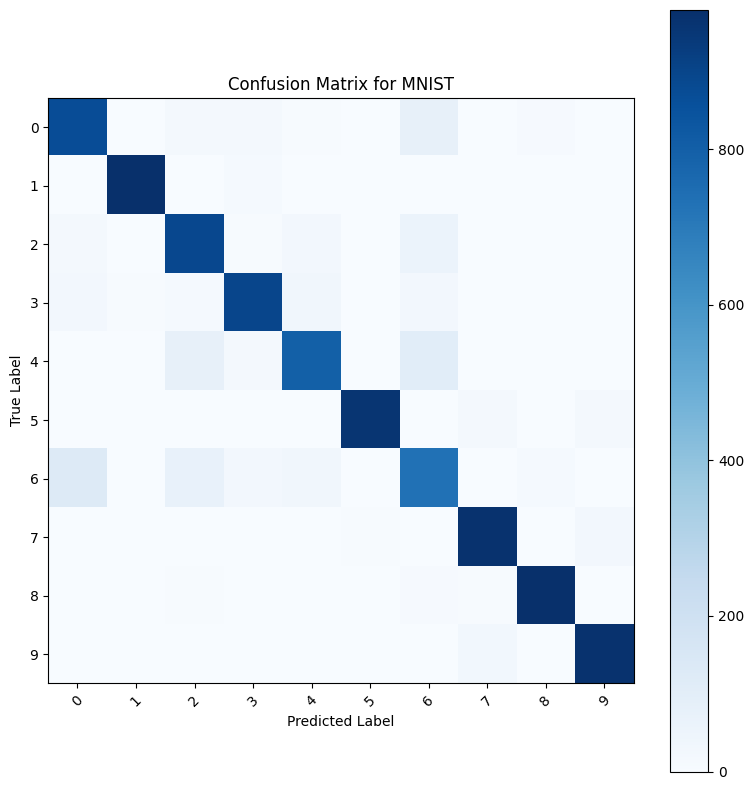

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

class_labels = [str(i) for i in range(10)]

cm = tf.math.confusion_matrix(
    labels=test_labels,
    predictions=np.argmax(predictions, axis=1)
)

plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for MNIST')
plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()


## Predicting an image

(28, 28, 1)
(28, 28, 1)


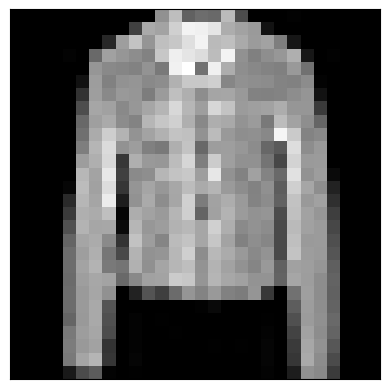

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
The model predicts that this image is a 4.


In [102]:
# grab an image
img = test_images[10]
print(img.shape)
# # rehape the image to (28, 28, 1)
img = img.reshape((28, 28, 1))
print(img.shape)
plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()
# predict the image
predictions = model.predict(img.reshape(1, 28, 28, 1))
print(f"The model predicts that this image is a {predictions.argmax()}.")